# Experiments to test and compare outlier detection algorithms

In this notebook, we test and compare the two outlier detection algorithms *kth nearest neighbor* known as *dkn*, and *One-time Sampling*.

We first use a toy dataset to check if they work properly.

In [1]:
import kth_NN as dkn# dee-kay-en
import sampling # one-time sampling
import numpy
%matplotlib inline

In [2]:
toy = numpy.zeros(shape=(10,5)) # 10 by 5 array of zeros

for i in range(0,10):
    toy[i] = [j for j in range(i,i+5)] # initialize all rows to be close to each other
    
toy[5] = [j for j in range(100,105)] # change one row(sixth row) to be farther
toy[9] = [j for j in range(1000,1005)] # change another row(10th row) to be even farther

In [106]:
# initialize parameters

k=3 # to check for the 3rd nearest neighbor distance 
s=3 # to use 3 rows of toy data set as sample
dummy_types = ['dd'] # input types (not implemented for this work yet, initialized to dummy values)
dummy_headers = ['hed'] # headers not implemented yet, dummy value for now.
n=2 # number of outliers that we want. (two rows were intialized differently, if it works, the two outliers
    # should be the two rows)



In [4]:
# the dkn model
dkn_model = dkn.KthNN(toy,dummy_types,dummy_headers,k,n) 
dkn_model.run()


Run dee-kay-en
Finding outliers using dee-kay-en took 0.00113487243652 seconds!


In [5]:
# check returned outliers
dkn_model.get_n_outliers()

[(5, array([ 100.,  101.,  102.,  103.,  104.])),
 (9, array([ 1000.,  1001.,  1002.,  1003.,  1004.]))]

In [6]:
# check the rest of the dataset
dkn_model.filter_n_outliers()

[array([ 0.,  1.,  2.,  3.,  4.]),
 array([ 1.,  2.,  3.,  4.,  5.]),
 array([ 2.,  3.,  4.,  5.,  6.]),
 array([ 3.,  4.,  5.,  6.,  7.]),
 array([ 4.,  5.,  6.,  7.,  8.]),
 array([  6.,   7.,   8.,   9.,  10.]),
 array([  7.,   8.,   9.,  10.,  11.]),
 array([  8.,   9.,  10.,  11.,  12.])]

In [7]:
# the sampling model
sampling_model = sampling.Sampling_Model(toy,dummy_types,dummy_headers,k,n,s)
sampling_model.run()

Run one time sampling
Finding outliers using one time sampling took 0.000493049621582 seconds!


In [8]:
# check returned outliers (triple of (index in the data set, instance, ))
sampling_model.get_n_outliers()

[(9, array([ 1000.,  1001.,  1002.,  1003.,  1004.])),
 (5, array([ 100.,  101.,  102.,  103.,  104.]))]

In [9]:
# check the rest
sampling_model.filter_n_outliers()

[array([ 0.,  1.,  2.,  3.,  4.]),
 array([ 1.,  2.,  3.,  4.,  5.]),
 array([ 2.,  3.,  4.,  5.,  6.]),
 array([ 3.,  4.,  5.,  6.,  7.]),
 array([ 4.,  5.,  6.,  7.,  8.]),
 array([  6.,   7.,   8.,   9.,  10.]),
 array([  7.,   8.,   9.,  10.,  11.]),
 array([  8.,   9.,  10.,  11.,  12.])]

## Inferences
As can be seen, both the models return the two rows that are initialized differently, as the two outliers. Also, as expected, the *dkn* model takes 0.00113487243652 seconds while the sampling model takes 0.000493049621582 seconds to compute, and this is just a small toy data set. The difference would be **huge** in larger data set.

## Results for Basketball data
Now that things seem to work properly, we try to compare both the models on the real datasets; first the Basketball statistics data taken from [here](http://basketballvalue.com/downloads.php). We preprocess the data to exclude strings (names, states, etc) and NaN values and only use the real values to detect outliers.

In [11]:
import pandas as pd

df = pd.read_csv("playerstats20120510040.txt", sep="\t") # read data
df.drop('AdjustedPM', axis=1, inplace=True) # drop nan columns
df.drop('AdjustedPMStdErr', axis=1, inplace=True) # drop non columns

numpy_array = df.as_matrix() # change to numpy array 


indices = [i for i in range(0,37) if (i < 1 or i> 2)] # exclude string  columns
numpy_array = numpy_array[:,indices]

data = numpy.zeros(shape=(len(numpy_array), len(numpy_array[0]))) # remove the dtype from the data (to feed to algorithms)

data[:] = numpy_array[0:len(numpy_array),0:len(numpy_array[0])]
data = numpy.transpose(data)
data = data[~numpy.isnan(data).any(axis=1)] # Transpose to exclude nan columns

data = numpy.transpose(data) # transpose back



array([[  1.00000000e+00,   9.45466700e+02,   1.79200000e+03, ...,
          1.29100000e+03,   3.65900000e-01,   6.78900000e-01],
       [  2.00000000e+00,   7.11950000e+02,   1.36600000e+03, ...,
          1.39000000e+03,   3.27500000e-01,   6.57200000e-01],
       [  3.00000000e+00,   6.81500000e+01,   1.28000000e+02, ...,
          1.65400000e+03,   3.07400000e-01,   6.85600000e-01],
       ..., 
       [  1.02900000e+03,   1.80166700e+02,   3.26000000e+02, ...,
          1.81300000e+03,   3.32200000e-01,   6.72000000e-01],
       [  1.03000000e+03,   3.87000000e+01,   7.40000000e+01, ...,
          2.03400000e+03,   3.03200000e-01,   6.84000000e-01],
       [  1.03100000e+03,   2.81333000e+01,   5.10000000e+01, ...,
          2.00300000e+03,   3.57800000e-01,   6.59700000e-01]])

## Comparison method for Basketball Data

Since there are a lot of instances in the data set and they are not labelled and we cannot predict which ones are outliers, we cannot compute the accuracy of the models in predicting outliers. What we can do though is measure the time they take for different data set size, and also we can check some random instances from the set of outliers detected and compare their values with some random instances that are not detected as outliers. This way we can see the difference.



In [12]:
len(data)

479

In [34]:
# We try to run the tests 5 times, using 100, 200, 300, 400, and finally 479 instances from the data set, to see
# how the computation time changes for the two algorithms as the size of data grows.
computation_time_dkn = [] # keep track of computation time at each run
computation_time_sampling = []
k = 5 # 5th nearest neighbor
s = 30 # sample size
n = 10 # 10 outliers
size = 100
for i in range(0,5):
    if i==4:
        size = 479
    partial_data = data[0:size,:]
    # the dkn model
    dkn_model_basketball = dkn.KthNN(partial_data,dummy_types,dummy_headers,k,n) 
    dkn_model_basketball.run()
    computation_time_dkn.append(dkn_model_basketball.get_running_time() )
    # the sampling model
    sampling_model_basketball = sampling.Sampling_Model(partial_data,dummy_types,dummy_headers,k,n,s) 
    sampling_model_basketball.run()
    computation_time_sampling.append(sampling_model_basketball.get_running_time() )
    size = size+100
    

Run dee-kay-en
Finding outliers using dee-kay-en took 0.158178091049 seconds!
Run one time sampling
Finding outliers using one time sampling took 0.130405902863 seconds!
Run dee-kay-en
Finding outliers using dee-kay-en took 0.496486186981 seconds!
Run one time sampling
Finding outliers using one time sampling took 0.208925962448 seconds!
Run dee-kay-en
Finding outliers using dee-kay-en took 1.00201797485 seconds!
Run one time sampling
Finding outliers using one time sampling took 0.526949882507 seconds!
Run dee-kay-en
Finding outliers using dee-kay-en took 1.78954195976 seconds!
Run one time sampling
Finding outliers using one time sampling took 0.426115989685 seconds!
Run dee-kay-en
Finding outliers using dee-kay-en took 2.56592297554 seconds!
Run one time sampling
Finding outliers using one time sampling took 0.540350914001 seconds!


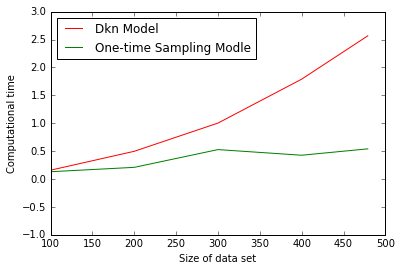

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x = [100,200,300,400,479]

axes = plt.gca()
plt.gca().set_color_cycle(['red', 'green'])

plt.plot(x, computation_time_dkn)
plt.plot(x, computation_time_sampling)
plt.xlabel('Size of data set')
plt.ylabel('Computational time')

plt.legend(['Dkn Model', 'One-time Sampling Modle'], loc='upper left')
axes.set_ylim([-1,3])

plt.show()

In [36]:
computation_time_dkn

[0.15817618370056152,
 0.49648404121398926,
 1.0020158290863037,
 1.789539098739624,
 2.5659210681915283]

In [37]:
computation_time_sampling

[0.13039708137512207,
 0.2089240550994873,
 0.5269467830657959,
 0.4261140823364258,
 0.540349006652832]

## Inferences about the two models based on Basketball Data
As can be seen from the graph and values of computation time for the two models, as the data size grows, the difference in computational time gets even bigger. One-time Sampling algorithm is computationally quite efficient.

### Correctness of outlier detection
We do not have the data instances labelled as outlier or inlier, but we can select two random outliers detected by our models and compare it with twp random instances that are not outliers and compare their values against each other to see the difference. 

In [78]:
import random
myRange = random.sample(range(0, len(dkn_model_basketball.get_n_outliers())), 2) # random outlier index
dkn_outliers = [d[1] for d in [dkn_model_basketball.get_n_outliers()[e] for e in myRange]  ] # random outliers

myRange = random.sample(range(0, len(dkn_model_basketball.filter_n_outliers())), 2) # random inlier index
dkn_inliers = [d for d in [dkn_model_basketball.filter_n_outliers()[e] for e in myRange]  ] # random inliers

dkn_inliers[0]

array([  7.70000000e+02,   2.05916700e+02,   3.93000000e+02,
         3.95000000e+02,   3.97000000e+02,   3.75000000e+02,
         8.70000000e+01,   9.00000000e+01,   1.42000000e+02,
         1.34000000e+02,   2.98208330e+03,   5.65800000e+03,
         5.66300000e+03,   5.87200000e+03,   5.76100000e+03,
         1.03782000e+02,   1.01730000e+02,   2.05170000e+00,
         1.09200000e+03,   9.65000000e+02,   1.95400000e+03,
         1.98300000e+03,   3.55100000e-01,   6.69400000e-01])

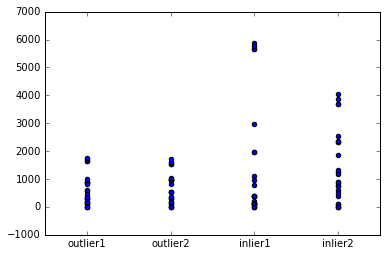

In [79]:

y = [dkn_outliers[0] ,dkn_outliers[1], dkn_inliers[0] ,dkn_inliers[1] ]
x = [1,2,3,4] # 1 and 2 are outliers, 3 and 4 are inliers

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye)

plt.xticks([1, 2, 3, 4])
plt.axes().set_xticklabels(['outlier1', 'outlier2', 'inlier1', 'inlier2'])

plt.show()

In [84]:
myRange = random.sample(range(0, len(sampling_model_basketball.get_n_outliers())), 2) # random outlier index
sampling_outliers = [d[1] for d in [sampling_model_basketball.get_n_outliers()[e] for e in myRange]  ] # random outliers

myRange = random.sample(range(0, len(sampling_model_basketball.filter_n_outliers())), 2) # random inlier index
sampling_inliers = [d for d in [sampling_model_basketball.filter_n_outliers()[e] for e in myRange]  ] # random inliers

sampling_inliers[0]

array([  1.00000000e+00,   9.45466700e+02,   1.79200000e+03,
         1.80000000e+03,   1.86200000e+03,   1.90400000e+03,
         3.70000000e+02,   3.04000000e+02,   6.18000000e+02,
         6.30000000e+02,   1.97953330e+03,   3.79700000e+03,
         3.78400000e+03,   4.03400000e+03,   4.02300000e+03,
         1.06242000e+02,   1.06316000e+02,  -7.43000000e-02,
         7.45000000e+02,   6.50000000e+02,   1.37400000e+03,
         1.29100000e+03,   3.65900000e-01,   6.78900000e-01])

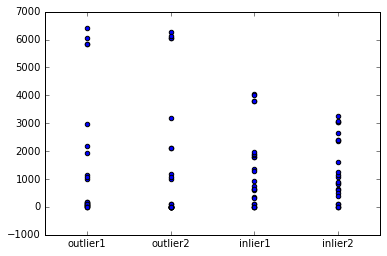

In [85]:
y = [sampling_outliers[0] ,sampling_outliers[1], sampling_inliers[0] ,sampling_inliers[1] ]
x = [1,2,3,4] # 1 and 2 are outliers, 3 and 4 are inliers

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye)

plt.xticks([1, 2, 3, 4])
plt.axes().set_xticklabels(['outlier1', 'outlier2', 'inlier1', 'inlier2'])

plt.show()

# Results from the scripts in How I Met Your Mother

I tested the two models on the scripts in the TV series; How I Met Your Mother. The data set was taken from [here](https://github.com/mneedham/neo4j-himym/blob/master/data/import/sentences.csv). The following script by [Mark Needham](http://www.markhneedham.com/blog/2015/02/15/pythonscikit-learn-calculating-tfidf-on-how-i-met-your-mother-transcripts/) has been used to calculate the tfidf (term frequency inverse document frequency) for each episode. I have then transformed the tfidf scores to format accepted by the two implemented algorithms.

In [87]:
# script from Mark Needham to calculate tfidf
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

episodes = defaultdict(list)
with open("himym", "r") as sentences_file:
    reader = csv.reader(sentences_file, delimiter=',')
    reader.next()
    for row in reader:
        episodes[row[1]].append(row[4])
 
for episode_id, text in episodes.iteritems():
    episodes[episode_id] = "".join(text)
 
corpus = []
for id, episode in sorted(episodes.iteritems(), key=lambda t: int(t[0])):
    corpus.append(episode)
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df = 0, stop_words = 'english')  
tfidf_matrix =  tf.fit_transform(corpus)
feature_names = tf.get_feature_names() 

In [91]:
# preprocess to format data into accepted format by the algorithms

tfidf_array = tfidf_matrix.toarray() # change to numpy

rows = tfidf_array.shape[0]
cols = tfidf_array.shape[1]
cols = cols+1 # we use the first column in each row to identify each instance of the data
data = numpy.zeros(shape=(rows,cols))
data[:,0] = range(0,rows) # set ID's for data instances
data[:,1:] = tfidf_array

In [95]:
# We try to run the tests 5 times, using 40, 80, 120, 160, and finally 208 instances from the data set, to see
# how the computation time changes for the two algorithms as the size of data grows.
computation_time_dkn_himym = [] # keep track of computation time at each run
computation_time_sampling_himym = []
k = 5 # 5th nearest neighbor
s = 30 # sample size
n = 10 # 10 outliers
size = 40
for i in range(0,5):
    if i==4:
        size = 208
    partial_data = data[0:size,:]
    # the dkn model
    dkn_model_himym = dkn.KthNN(partial_data,dummy_types,dummy_headers,k,n) 
    dkn_model_himym.run()
    computation_time_dkn_himym.append(dkn_model_himym.get_running_time() )
    # the sampling model
    sampling_model_himym = sampling.Sampling_Model(partial_data,dummy_types,dummy_headers,k,n,s) 
    sampling_model_himym.run()
    computation_time_sampling_himym.append(sampling_model_himym.get_running_time() )
    size = size+40
    

Run dee-kay-en
Finding outliers using dee-kay-en took 128.522828102 seconds!
Run one time sampling
Finding outliers using one time sampling took 87.7343039513 seconds!
Run dee-kay-en
Finding outliers using dee-kay-en took 427.147110939 seconds!
Run one time sampling
Finding outliers using one time sampling took 144.394839048 seconds!
Run dee-kay-en
Finding outliers using dee-kay-en took 889.542392969 seconds!
Run one time sampling
Finding outliers using one time sampling took 246.490548849 seconds!
Run dee-kay-en
Finding outliers using dee-kay-en took 1945.20552301 seconds!
Run one time sampling
Finding outliers using one time sampling took 358.080737829 seconds!
Run dee-kay-en
Finding outliers using dee-kay-en took 2940.75869989 seconds!
Run one time sampling
Finding outliers using one time sampling took 413.421524048 seconds!


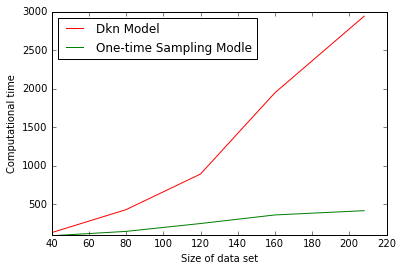

In [96]:


x = [40,80,120,160,208]

axes = plt.gca()
plt.gca().set_color_cycle(['red', 'green'])

plt.plot(x, computation_time_dkn_himym)
plt.plot(x, computation_time_sampling_himym)
plt.xlabel('Size of data set')
plt.ylabel('Computational time')

plt.legend(['Dkn Model', 'One-time Sampling Modle'], loc='upper left')
axes.set_ylim([100,3000])

plt.show()

In [97]:
computation_time_dkn_himym # in seconds

[128.52278804779053,
 427.1470890045166,
 889.5423359870911,
 1945.2054469585419,
 2940.7586300373077]

## Inferences about the two models based on Basketball Data
As can be seen from the graph and values of computation time for the two models, as the data size grows, the difference in computational time gets even bigger. One-time Sampling algorithm is computationally quite efficient.

### Correctness of outlier detection
We do not have the data instances labelled as outlier or inlier, but we can select two random outliers detected by our models and compare it with twp random instances that are not outliers and compare their values against each other to see the difference. 

In [99]:
dkn_model_himym.get_n_outliers()

[(167, array([ 167.,    0.,    0., ...,    0.,    0.,    0.])),
 (178, array([ 178.,    0.,    0., ...,    0.,    0.,    0.])),
 (143, array([ 143.,    0.,    0., ...,    0.,    0.,    0.])),
 (148, array([ 148.,    0.,    0., ...,    0.,    0.,    0.])),
 (182, array([  1.82000000e+02,   6.46361866e-03,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00])),
 (140, array([  1.40000000e+02,   1.26115154e-02,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00])),
 (51, array([  5.10000000e+01,   6.80515015e-03,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00])),
 (190, array([ 190.,    0.,    0., ...,    0.,    0.,    0.])),
 (174, array([ 174.,    0.,    0., ...,    0.,    0.,    0.])),
 (150, array([ 150.,    0.,    0., ...,    0.,    0.,    0.]))]

In [98]:
myRange = random.sample(range(0, len(dkn_model_himym.get_n_outliers())), 2) # random outlier index
dkn_outliers = [d[1] for d in [dkn_model_himym.get_n_outliers()[e] for e in myRange]  ] # random outliers

myRange = random.sample(range(0, len(dkn_model_himym.filter_n_outliers())), 2) # random inlier index
dkn_inliers = [d for d in [dkn_model_himym.filter_n_outliers()[e] for e in myRange]  ] # random inliers

dkn_inliers[0]

array([ 12.,   0.,   0., ...,   0.,   0.,   0.])

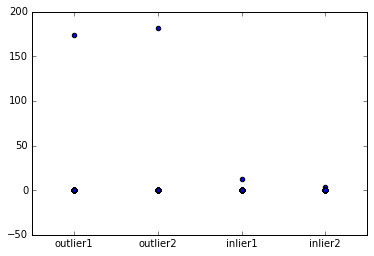

In [100]:

y = [dkn_outliers[0] ,dkn_outliers[1], dkn_inliers[0] ,dkn_inliers[1] ]
x = [1,2,3,4] # 1 and 2 are outliers, 3 and 4 are inliers

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye)

plt.xticks([1, 2, 3, 4])
plt.axes().set_xticklabels(['outlier1', 'outlier2', 'inlier1', 'inlier2'])

plt.show()

In [104]:
myRange = random.sample(range(0, len(sampling_model_himym.get_n_outliers())), 2) # random outlier index
sampling_outliers = [d[1] for d in [sampling_model_himym.get_n_outliers()[e] for e in myRange]  ] # random outliers

myRange = random.sample(range(0, len(sampling_model_himym.filter_n_outliers())), 2) # random inlier index
sampling_inliers = [d for d in [sampling_model_himym.filter_n_outliers()[e] for e in myRange]  ] # random inliers

sampling_inliers[0]

array([ 118.,    0.,    0., ...,    0.,    0.,    0.])

In [102]:
sampling_model_himym.get_n_outliers()

[(159, array([  1.59000000e+02,   6.95284758e-03,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00])),
 (152, array([  1.52000000e+02,   3.65203934e-02,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00])),
 (56, array([ 56.,   0.,   0., ...,   0.,   0.,   0.])),
 (57, array([ 57.,   0.,   0., ...,   0.,   0.,   0.])),
 (89, array([  8.90000000e+01,   4.42611716e-03,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00])),
 (72, array([ 72.,   0.,   0., ...,   0.,   0.,   0.])),
 (84, array([ 84.,   0.,   0., ...,   0.,   0.,   0.])),
 (192, array([ 192.,    0.,    0., ...,    0.,    0.,    0.])),
 (8, array([ 8.,  0.,  0., ...,  0.,  0.,  0.])),
 (67, array([ 67.,   0.,   0., ...,   0.,   0.,   0.]))]

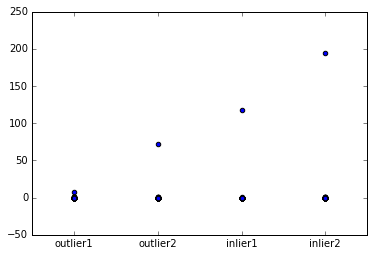

In [105]:
y = [sampling_outliers[0] ,sampling_outliers[1], sampling_inliers[0] ,sampling_inliers[1] ]
x = [1,2,3,4] # 1 and 2 are outliers, 3 and 4 are inliers

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye)

plt.xticks([1, 2, 3, 4])
plt.axes().set_xticklabels(['outlier1', 'outlier2', 'inlier1', 'inlier2'])

plt.show()